# Task 4
# To Develop a Hand Gesture Recognition Model
## By Adhikrit Gupta

Num GPUs Available:  2
Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.
Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  3/500 ━━━━━━━━━━━━━━━━━━━━ 33s 68ms/step - accuracy: 0.0747 - loss: 12.4708

W0000 00:00:1717090407.092909     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.4474 - loss: 2.9889

W0000 00:00:1717090473.754937     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


500/500 ━━━━━━━━━━━━━━━━━━━━ 88s 166ms/step - accuracy: 0.4478 - loss: 2.9864 - val_accuracy: 0.7765 - val_loss: 1.1676
Epoch 2/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/25


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 162ms/step - accuracy: 0.8295 - loss: 0.9881 - val_accuracy: 0.8278 - val_loss: 0.9863
Epoch 4/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 161ms/step - accuracy: 0.8624 - loss: 0.8440 - val_accuracy: 0.8460 - val_loss: 0.9032
Epoch 6/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 164ms/step - accuracy: 0.8838 - loss: 0.7600 - val_accuracy: 0.8020 - val_loss: 0.9447
Epoch 8/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 84s 165ms/step - accuracy: 0.9047 - loss: 0.6828 - val_accuracy: 0.8278 - val_loss: 0.8877
Epoch 10/25
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/ste

W0000 00:00:1717091565.154051     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step


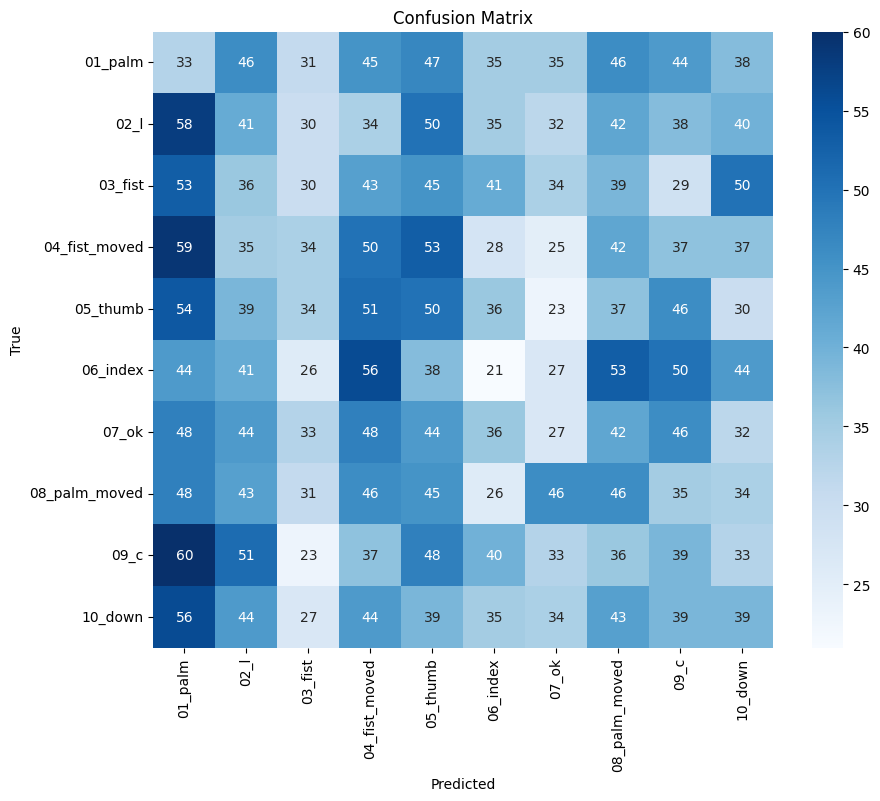

               precision    recall  f1-score   support

      01_palm       0.06      0.08      0.07       400
         02_l       0.10      0.10      0.10       400
      03_fist       0.10      0.07      0.09       400
04_fist_moved       0.11      0.12      0.12       400
     05_thumb       0.11      0.12      0.12       400
     06_index       0.06      0.05      0.06       400
        07_ok       0.09      0.07      0.08       400
08_palm_moved       0.11      0.12      0.11       400
         09_c       0.10      0.10      0.10       400
      10_down       0.10      0.10      0.10       400

     accuracy                           0.09      4000
    macro avg       0.09      0.09      0.09      4000
 weighted avg       0.09      0.09      0.09      4000

Found 20000 images belonging to 10 classes.
  2/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.9297 - loss: 0.5898  

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.9460 - loss: 0.4402
Test Loss: 0.42273080348968506
Test Accuracy: 0.9503499865531921


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure TensorFlow uses the GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Define paths
dataset_path = '/kaggle/input/gesturerecog/leapGestRecog'
test_dataset_path = '/kaggle/input/gesturerecog/leapGestRecog'

# Image parameters
img_width, img_height = 64, 64
batch_size = 32

# Data augmentation and normalization for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    rotation_range=30,
    horizontal_flip=True,
    validation_split=0.2)  # 20% validation split

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Model definition with regularization
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=25)

# Save the trained model
model.save('hand_gesture_model.h5')

# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Validation Loss: {validation_loss}')
print(f'Validation Accuracy: {validation_accuracy}')

# Get true labels and predictions for the validation set
validation_generator.reset()
Y_pred = model.predict(validation_generator, validation_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm_labels = list(validation_generator.class_indices.keys())

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=cm_labels)
print(report)

# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
The predicted gesture is: 07_ok


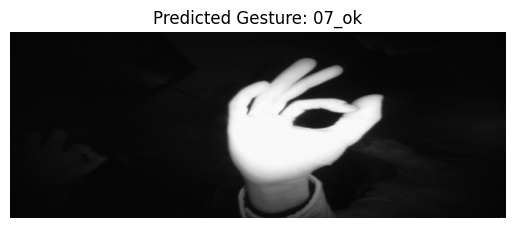

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('hand_gesture_model.h5')

# Function to preprocess the image
def preprocess_image(img_path, target_size=(64, 64)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalizing the image
    return img_array

# Function to predict the gesture
def predict_gesture(img_path, model, class_indices):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    
    # Map predicted class index to class label
    class_labels = {v: k for k, v in class_indices.items()}
    gesture = class_labels[predicted_class[0]]
    return gesture

# Provide the path to an image for testing
test_image_path = '/kaggle/input/gesturerecog/leapGestRecog/07_ok/frame_00_07_0001.png'  # Replace with the path to your test image

# Get class indices from the training data generator
class_indices = train_generator.class_indices

# Predict the gesture
predicted_gesture = predict_gesture(test_image_path, model, class_indices)

# Display the result
print(f'The predicted gesture is: {predicted_gesture}')

# Optionally, display the image
img = image.load_img(test_image_path)
plt.imshow(img)
plt.title(f'Predicted Gesture: {predicted_gesture}')
plt.axis('off')
plt.show()
